In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import missingno as msno

Voici notre Base de données

In [114]:
df = pd.read_csv('donnee_brief.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Partie Analyse

Prépartion des données

In [115]:
df.shape
#On regarde le nombre de données et de colonnes.

(1338, 7)

In [116]:
df.dtypes
#On regarde le type des données

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

On remarque que l'on a 3 types objets , on va les analysés.

In [117]:
#On observe le tyode des objets étudiés
print(type(df['sex'][0]))
print(type(df['smoker'][0]))
print(type(df['region'][0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [118]:
df['sex'].unique()
#Il n'y a que deux modalités male et female, il ne seble pas y avoir de valeurs atypiques

array(['female', 'male'], dtype=object)

In [119]:
df['smoker'].unique()
#Il n'y a que deux modlités yes et no , il ne semble pas y avoir de valeur atypiques

array(['yes', 'no'], dtype=object)

In [120]:
df['region'].unique()
#Il y a 4 modalités/possibilités southwest , southeast , northwest et northeast , il ne semble pas y avoir de valeurs atypiques.

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [121]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
#On modifie le type de nos colonnes en categorie pour pouvoir les manipuler dans le machine learning.

Question n°1 Vérifiez les informations manquantes et les doublons (missingno)

On vérifie si il y a des valeurs manquantes.

In [122]:
df.isnull().sum()
#Il n'y a pas de valeurs nulles.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: >

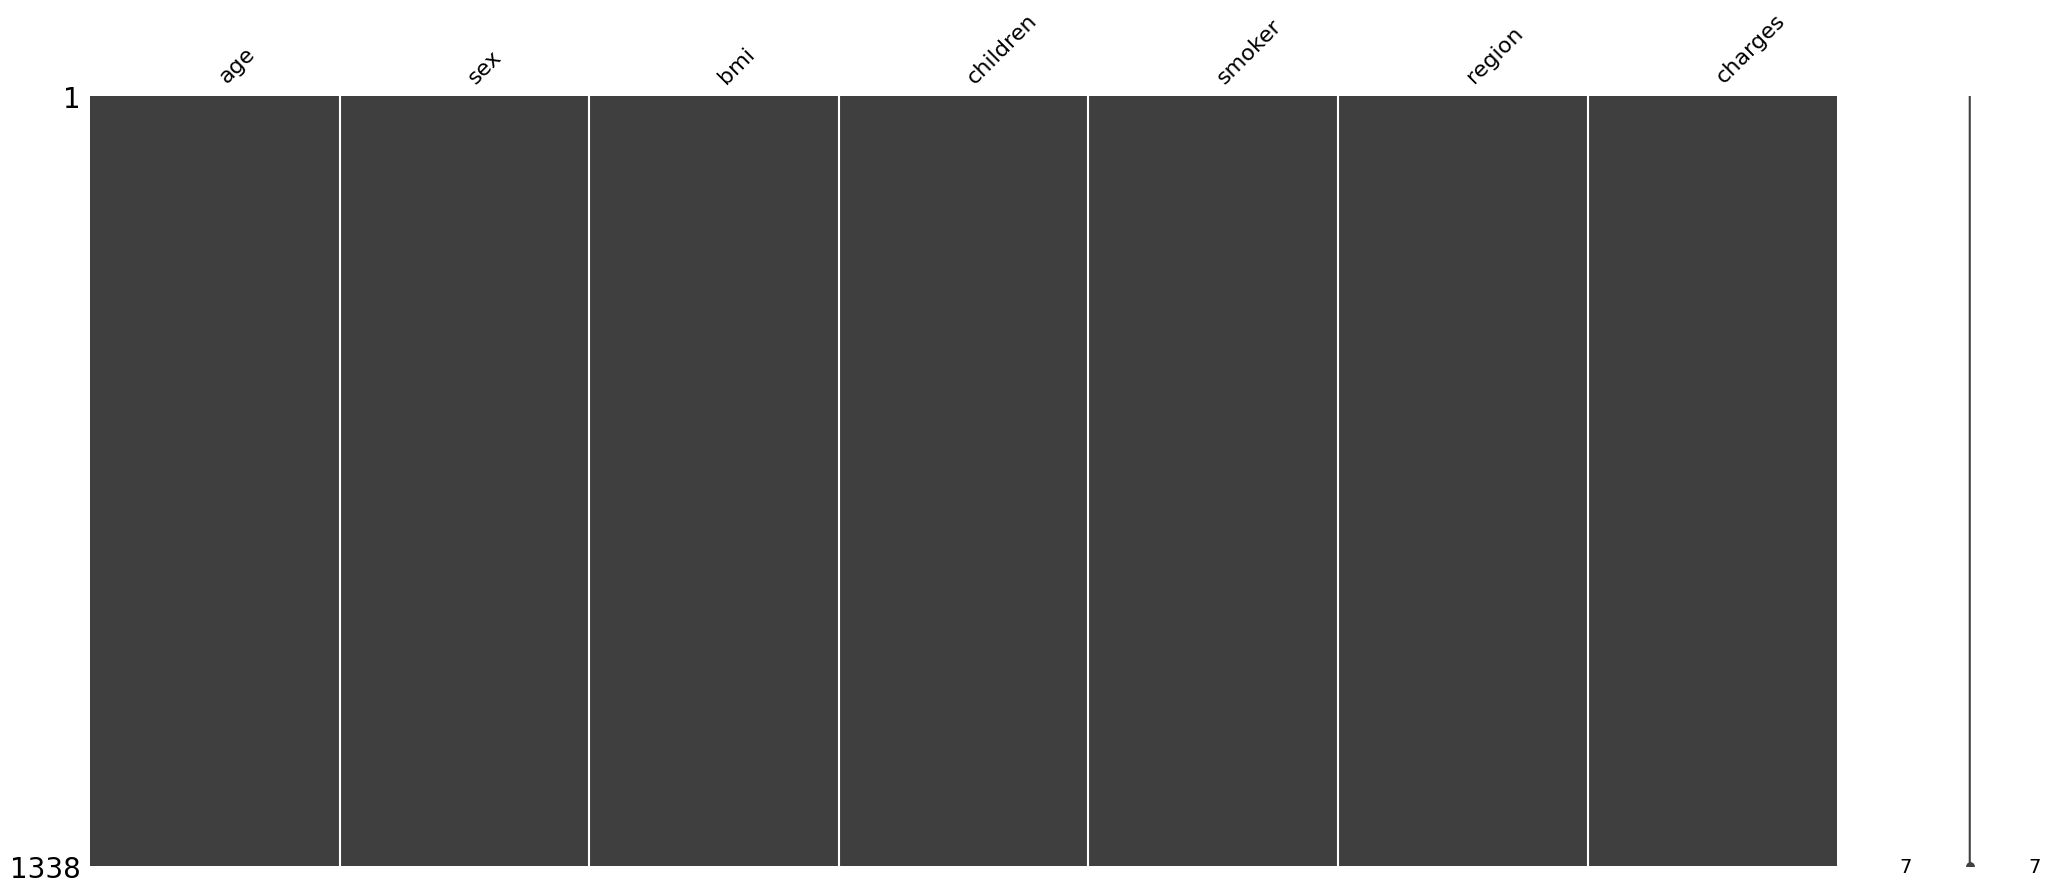

In [123]:
#Une manière graphique de vérifier si il y a des valeurs manquantes est d'utiliser missigno
msno.matrix(df)

In [124]:
# pour afficher uniquement les variables qui ont des valeurs manquantes ( un filtre qui peut être utile , même si ici ce n'est pas le cas)

nb_na = df.isnull().sum()
nb_na[nb_na>0]

Series([], dtype: int64)

Vérifions maintenant s'il y a des doublons

In [125]:
df.duplicated().nunique()
#Il semblerait qu'il y en ai deux,soit un seul élement mis deux fois.

2

In [126]:
df.loc[df.duplicated(keep='first'),:]
#On recherche l'element en double.

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [127]:
df.loc[df.duplicated(keep=False),:]
#On vérifie ici si cela est une erreur de "copie", si les index des deux élements sont proche alors on peut eliminer de manière sure la données en double.

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Les index ne sont pas proches , donc nous ne pouvons pas conclure si cela est une erreur de copie, il nous faudrait plus d'informations.
essayons de calculer la probabilités que deux personnes soit à ce point identiques.

La probabilité que 2 personnes aient le même indice de masse corporelle (IMC) est extrêmement faible. Étant donné que l'IMC est calculé à partir des valeurs de poids et de taille et que ces valeurs sont uniques pour chaque personne, la probabilité que 2 personnes aient le même IMC est très faible.
Nous considèrerons donc que cela est dû à une erreur et allons donc supprimer les doublons

In [128]:
#On va supprimer les doublons.
df =df.drop_duplicates()
df.shape
#Les doublons ont été supprimées.

(1337, 7)

Vérifions les valeurs abberants

In [129]:
df.describe()
#On récupère les infos des colonnes à données quantitatives.

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [130]:
liste_variable_quantitative = df.describe().columns.to_list()

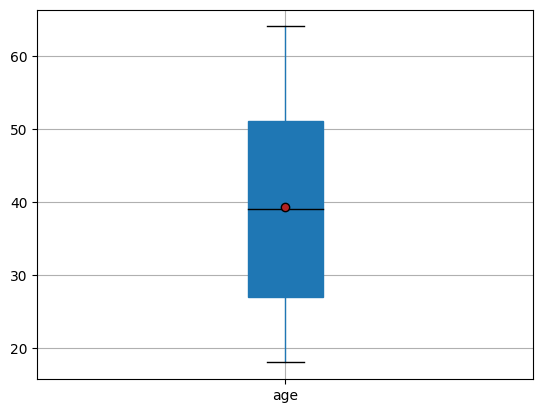

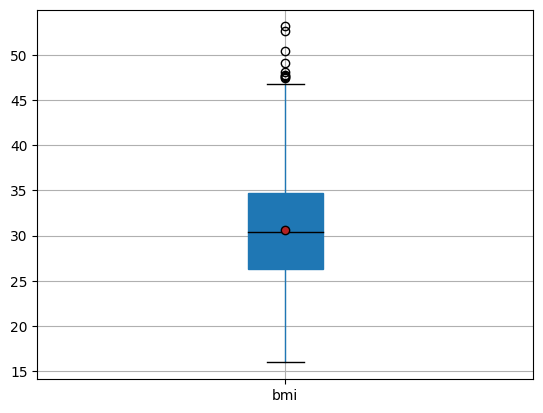

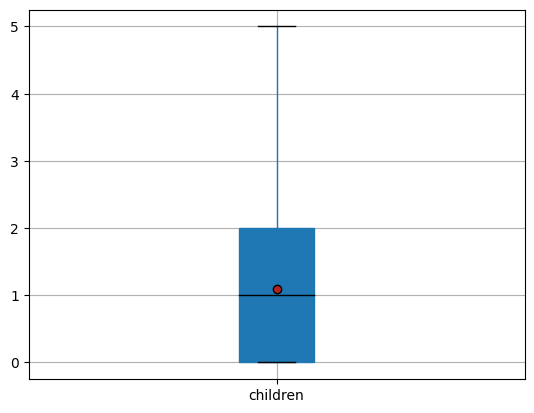

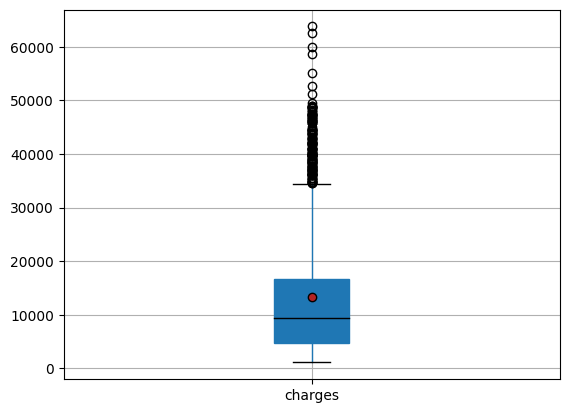

In [131]:
# Tracé des boîtes à moustaches
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for i in liste_variable_quantitative :
    df.boxplot(column=i, medianprops=medianprops,patch_artist=True, showmeans=True, meanprops=meanprops)

    plt.show()

#Il semblerait que la BMI et les charges ont des valeurs atypiques, mais sans contexte on ne peut pas prendre la décision de supprimé les outliers.
#Les valeurs ne sont donc pas abberantes.

In [132]:
print(df['smoker'].unique())
print(df['smoker'].value_counts())
#Il n' y a as de valeurs abberantes dans la variable fumeur.

['yes', 'no']
Categories (2, object): ['no', 'yes']
no     1063
yes     274
Name: smoker, dtype: int64


In [133]:
print(df['sex'].unique())
print(df['sex'].value_counts())
#Il n' y a as de valeurs abberantes dans la variable genre.

['female', 'male']
Categories (2, object): ['female', 'male']
male      675
female    662
Name: sex, dtype: int64


In [134]:
print(df['region'].unique())
print(df['region'].value_counts())
#Il n' y a as de valeurs abberantes dans la variable region.

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64


In [135]:
print(df['children'].unique())
print(df['children'].value_counts())
#Il n' y a as de valeurs abberantes dans la variable children.

[0 1 3 2 5 4]
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


Il n'y a donc pas de valeurs abberantes dans notre dataset.

Question n°2 Analyse univarié de chaque variable

In [136]:
liste_variable =df.columns.to_list()
liste_variable

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Analyse de l'âge

In [137]:
print("Moyenne de l'âge")
print(df['age'].mean())
print("Mode de l'âge")
print(df['age'].mode())
print("Mediane de l'âge")
print(df['age'].median())
print("Etendue de l'âge")
print((df['age'].max()-df['age'].min()))
print("Ecart-type de l'âge")
print(df['age'].std())
print("Coefficient de variation de l'âge")
print(df['age'].std() / df['age'].mean())



Moyenne de l'âge
39.222139117427076
Mode de l'âge
0    18
Name: age, dtype: int64
Mediane de l'âge
39.0
Etendue de l'âge
46
Ecart-type de l'âge
14.044332734156425
Coefficient de variation de l'âge
0.35807156494216513


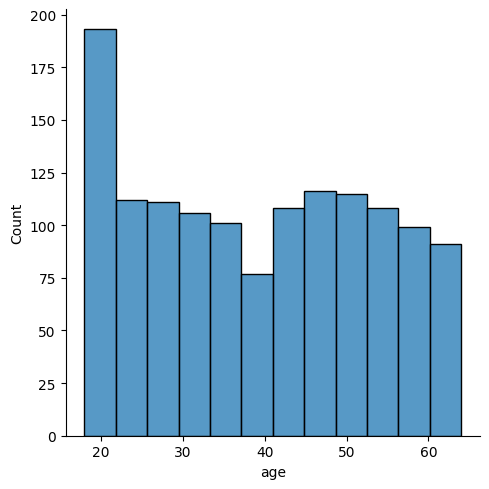

In [138]:
sns.displot(df, x='age')
#Cela ne ressemble pas à une distribution normale , mais plutot equiprobable , avec un pic pour les 18 ans ,
# surement dû à une promotion pour la majorité, une pratique courante pour les banques .


Analyse du genre

male      0.504862
female    0.495138
Name: sex, dtype: float64


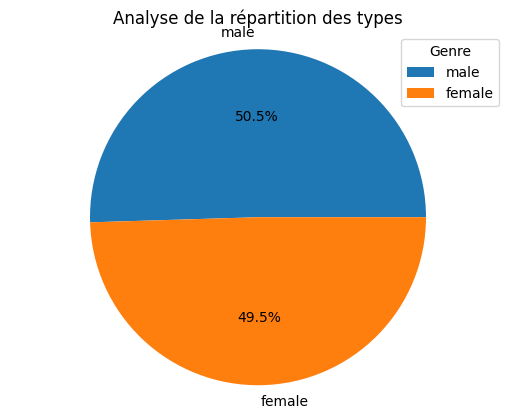

In [139]:
data_sex = df['sex']


counts_sex = data_sex.value_counts()
counts_sex = counts_sex / sum(counts_sex)

print(counts_sex)

plt.pie(counts_sex, labels=counts_sex.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Analyse de la répartition des types')
plt.legend(title='Genre')
plt.show()

#Cela me semble plutôt équilibré , ce qui revèle une politique égalitaire 
#homme femme dans la banque

Analyse de la BMI 

In [140]:
print("Moyenne de la BMI")
print(df['bmi'].mean())
print("Mode de la BMI")
print(df['bmi'].mode())
print("Mediane de la BMI")
print(df['bmi'].median())
print("Etendue de la BMI")
print((df['bmi'].max()-df['bmi'].min()))
print("Ecart-type de la BMI")
print(df['bmi'].std())
print("Coefficient de variation de la BMI")
print(df['bmi'].std() / df['bmi'].mean())

Moyenne de la BMI
30.66345175766642
Mode de la BMI
0    32.3
Name: bmi, dtype: float64
Mediane de la BMI
30.4
Etendue de la BMI
37.17
Ecart-type de la BMI
6.100468409615801
Coefficient de variation de la BMI
0.198949174340445


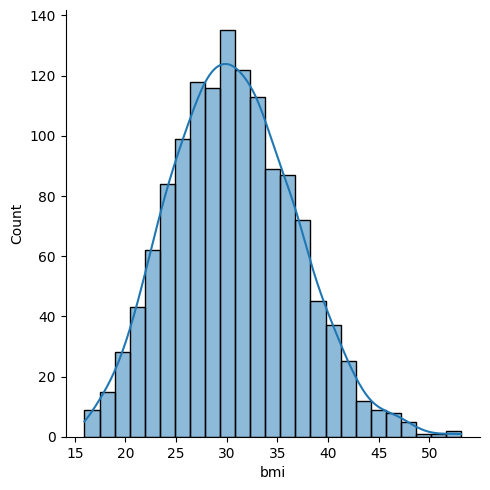

In [141]:
sns.displot(df, x='bmi',kde=True)
#La distribution semble normale ici, ce qui indique une répartition 
#équilibré

L'analyse du nombre d'enfants

Réflexion : On remarque ici que le nombre d'enfants peut être traité comme une variable catégorielle,
dû au fait qu'il n'y a que de 0 à 5 enfants. Cela n'est peut être pas vrai pour un plus grand nombre de données ,
mais pour effectuer des test , il serait plus logique de considérer que c'est une catégorie

In [142]:
df['children'] = df['children'].astype('category')

0    0.428571
1    0.242334
2    0.179506
3    0.117427
4    0.018699
5    0.013463
Name: children, dtype: float64


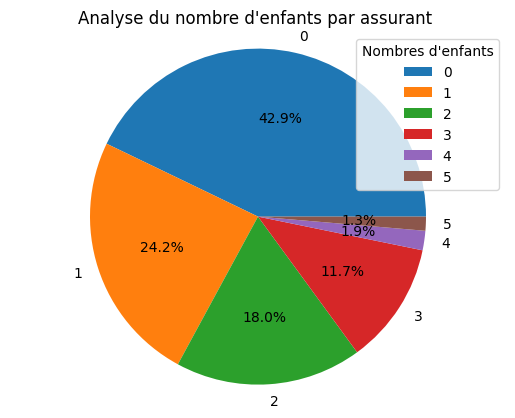

In [143]:
data_enfant = df['children']

counts_enfants = data_enfant.value_counts()
counts_enfants = counts_enfants / sum(counts_enfants)

print(counts_enfants)

plt.pie(counts_enfants, labels=counts_enfants.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Analyse du nombre d'enfants par assurant ")
plt.legend(title="Nombres d'enfants")
plt.show()
#C'est normal qu'il y ai de moins en moins d'enfants par assurant au vu des difficultés d'en avoir

Analyse des fumeurs

no     0.795064
yes    0.204936
Name: smoker, dtype: float64


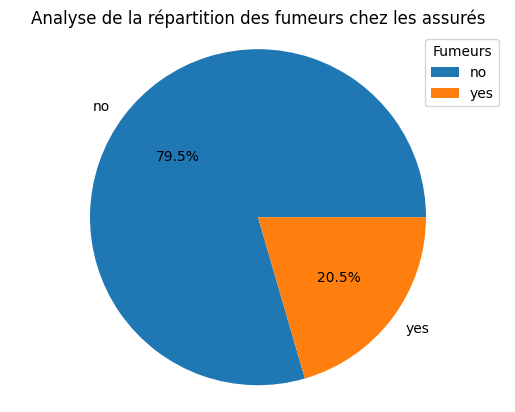

In [144]:
data_smoker = df['smoker']

counts_smoker = data_smoker.value_counts()
counts_smoker = counts_smoker / sum(counts_smoker)

print(counts_smoker)

plt.pie(counts_smoker, labels=counts_smoker.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Analyse de la répartition des fumeurs chez les assurés')
plt.legend(title='Fumeurs')
plt.show()

#Cela me semble logique que ceux qui veulent s'assurrer prennent soin de leurs santé et donc ne fument pas
#Il peut y avoir une politique qui charge les fumeurs dû à un risque de mortalité plus
#élevé, et donc qui dissuade les fumeurs .

Analyse des régions

southeast    0.272251
southwest    0.243082
northeast    0.242334
northwest    0.242334
Name: region, dtype: float64


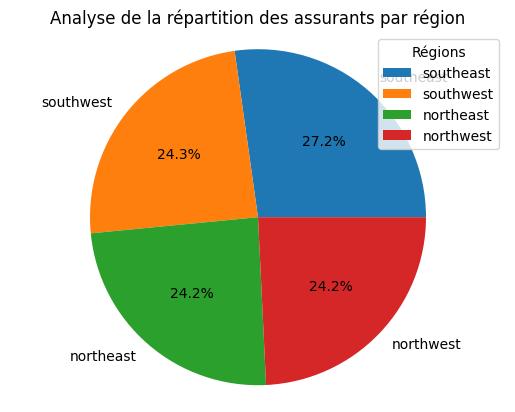

In [145]:
data_region = df['region']

counts_region = data_region.value_counts()
counts_region = counts_region / sum(counts_region)

print(counts_region)

plt.pie(counts_region, labels=counts_region.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Analyse de la répartition des assurants par région')
plt.legend(title='Régions')
plt.show()

#La répartition me semble équiprobable , ce qui veut dire que la banque 
#récupère des assurés de manières équitables des différents régions .
# ou qu'elle à un monopôle sur les 4 régions.

Analyse des charge

In [146]:
print("Moyenne des charges")
print(df['charges'].mean())
print("Mode des charges")
print(df['charges'].mode())
print("Mediane des charges")
print(df['charges'].median())
print("Etendue des charges")
print((df['charges'].max()-df['charges'].min()))
print("Ecart-type des charges")
print(df['charges'].std())
print("Coefficient de variation des charges")
print(df['charges'].std() / df['charges'].mean())

Moyenne des charges
13279.121486655948
Mode des charges
0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1332    55135.40209
1333    58571.07448
1334    60021.39897
1335    62592.87309
1336    63770.42801
Name: charges, Length: 1337, dtype: float64
Mediane des charges
9386.1613
Etendue des charges
62648.554110000005
Ecart-type des charges
12110.359656344175
Coefficient de variation des charges
0.9119850035647126


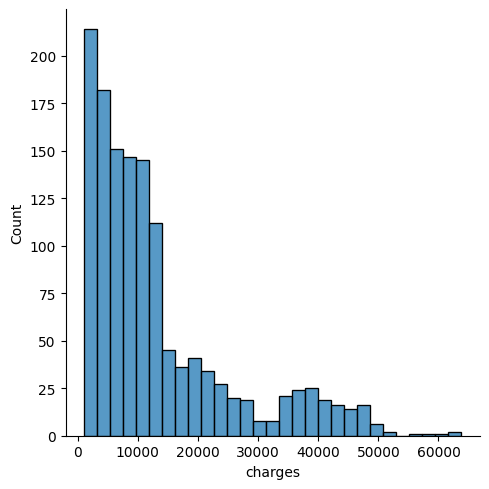

In [147]:
sns.displot(df, x='charges',)
#La distribution semble irrégulière ici , on aurait besoin de la transformer/standardiser.

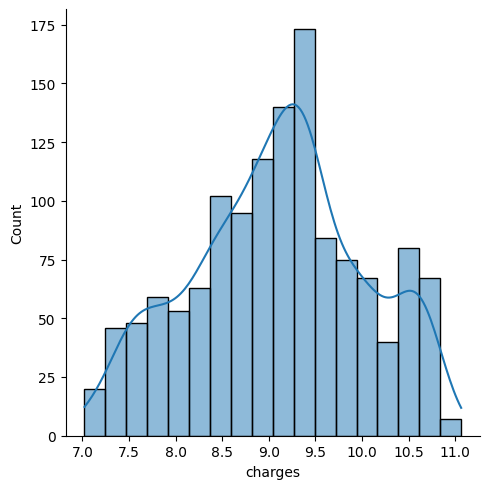

In [148]:
data_log_charge = df[['charges']].apply(np.log)

sns.displot(data_log_charge, x='charges',kde=True)
#En appliquant une transformé logarithmique, on remarque que la distribution peut être proche d'une distribution normale, ce qui veut 
# dire que bien que l'échelle des charges soit très grande , la distribution peut être normale.

Question n°3
Analyse de la charge

In [149]:
#La charge est une variable quantitative ,ce qui veut dire que nous allons faire soit des test de correlations ou des t-tests
#Nous allons d'abord faire la correlation entre variable quantitative
#Nous allons faire la correlation entre la charge et l'age
correlation_charge_age = df['charges'].corr(df['age'])
print("correlation charge et age:",correlation_charge_age)
#Nous allons faire la correlation entre la charge et la bmi
correlation_charge_bmi = df['charges'].corr(df['bmi'])
print("correlation charge et bmi:",correlation_charge_bmi)

correlation charge et age: 0.2983082125097864
correlation charge et bmi: 0.1984008312262494


/tmp/ipykernel_9658/4025128659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/tmp/ipykernel_9658/4025128659.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_to_charges = df.drop('charges', axis=1).corrwith(df['charges'])


<AxesSubplot: >

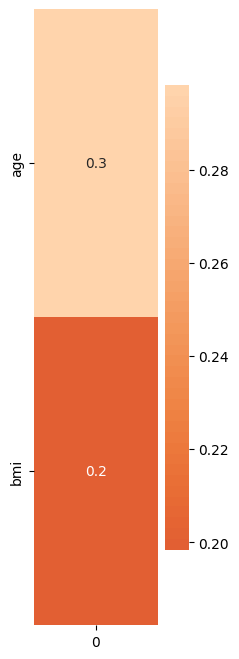

In [150]:
corr = df.corr()
corr_to_charges = df.drop('charges', axis=1).corrwith(df['charges'])
fig, ax = plt.subplots()
fig.set_size_inches(2,8)

sns.heatmap(pd.DataFrame(corr_to_charges), center=0, ax=ax, annot=True)

In [151]:


#Maintenant nous allons faire la correlation entre la charge une variable quantitative et les variable qualitative (catégorie) 
# ici nous allons faire un t-test

t_charge_enfant, p_charge_enfant = st.ttest_ind(df["charges"], df['children'])


print("T-test entre charge et enfant")
print("t-value:", t_charge_enfant)
print("p-value:", p_charge_enfant)

T-test entre charge et enfant
t-value: 40.09056408171625
p-value: 1.401882311005928e-275


In [152]:
#On va comparer avec le test  kruskal qui est un test ANOVA entre variable quantitative et variable categorielle

data_children = [df[df['children'] == r]['charges'] for r in df['children'].unique()]

stat, p_value = st.kruskal(*data_children)


print(f"Mesure = {stat:.3f}, p_value = {p_value:.3f}")
#Le test kruskal peut être plus intéressant car plus résistant pour des données qui ressemble à des  distributions normales,comme nos charges ici.

Mesure = 29.121, p_value = 0.000


In [153]:
#Analyse Genre charge, on utilise une pointbiserial car on à ici une variable catégorielle binaire.
t_charge_sex, p_charge_sex = st.pointbiserialr(df["charges"], df['sex'].replace({'male':0,'female' :1}))

print("pointbiserialr entre charge et genre")
print("t-value:", t_charge_sex)
print("p-value:", p_charge_sex)

pointbiserialr entre charge et genre
t-value: -0.05804449579031286
p-value: 0.03382079199510838


In [154]:
#On va comparer avec le test  kruskal qui est un test ANOVA entre variable quantitative et variable categorielle
#Ici , pour comparer quelle test semble le plus intéressant

data_genre = [df[df['sex'] == r]['charges'] for r in df['sex'].unique()]


stat, p_value = st.kruskal(*data_genre)


print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")
#Le test kruskal ici me semble moin pertinent , dû à l'étude de la p-value.

statistic = 0.154, p_value = 0.694


<AxesSubplot: xlabel='sex', ylabel='charges'>

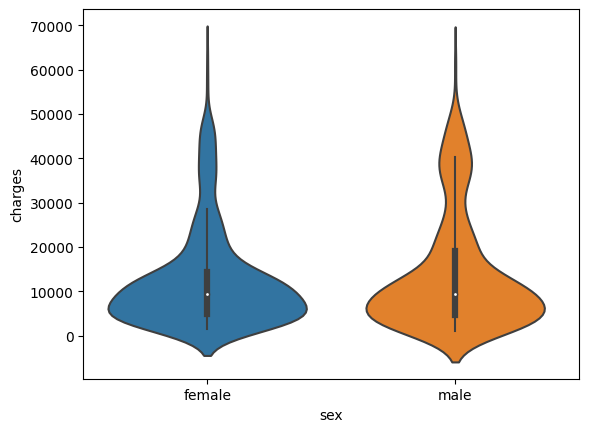

In [155]:
sns.violinplot(x='sex', y='charges', data=df)

In [156]:

#t-test entre charge et fumeur
t_charge_fumeur, p_charge_fumeur = st.pointbiserialr(df["charges"], df['smoker'].replace({'yes':0,'no' :1}))

# On affiche la t-value et la p-value
print("pointbiserialr entre charge et fumeur")
print("t-value:", t_charge_fumeur)
print("p-value:", p_charge_fumeur)


pointbiserialr entre charge et fumeur
t-value: -0.7872343672800316
p-value: 1.4067220949375363e-282


In [157]:
#On va comparer avec le test  kruskal qui est un test ANOVA entre variable quantitative et variable categorielle
# Sélection des données de la colonne "charges" en fonction de la colonne "smoker"
data_children = [df[df['smoker'] == r]['charges'] for r in df['smoker'].unique()]

stat, p_value = st.kruskal(*data_children)

print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")
#Ici , le resultat est intéressant car la p -value est nulle pour le test Kruskal, mais après études du fait de fumer , 
# il y a une forte influence sur les autres variable , je vais donc préferais le test pointbiserial

statistic = 588.347, p_value = 0.000


<AxesSubplot: xlabel='smoker', ylabel='charges'>

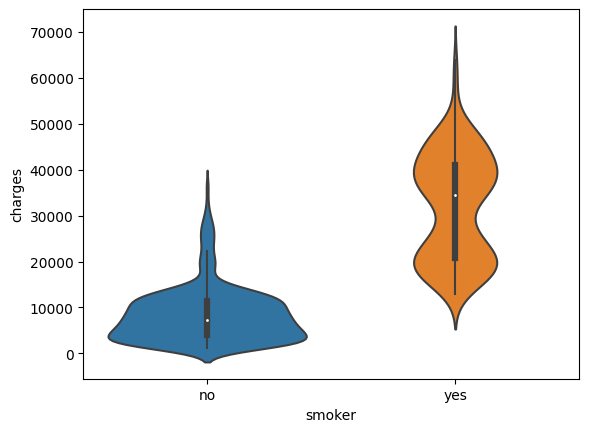

In [158]:
sns.violinplot(x='smoker', y='charges', data=df)

<AxesSubplot: xlabel='region', ylabel='charges'>

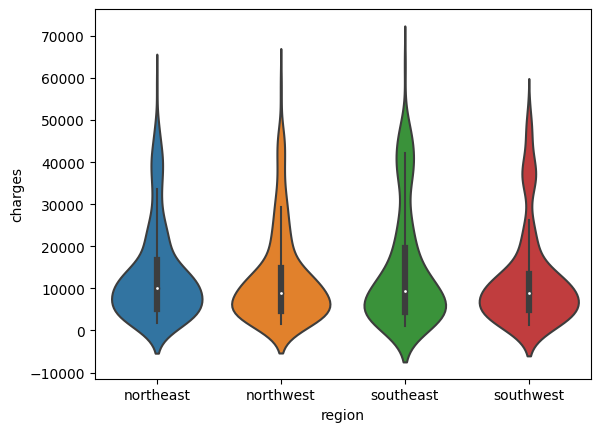

In [159]:
sns.violinplot(x='region', y='charges', data=df)

In [160]:

t_charge_region, p_charge_region = st.ttest_ind(df["charges"], df['region'].replace({'southeast':0,'southwest' :1, 'northeast':2 ,'northwest':3}))

print("T-test entre charge  et region")
print("t-value:", t_charge_region)
print("p-value:", p_charge_region)

T-test entre charge  et region
t-value: 40.0894801326144
p-value: 1.4404664073876777e-275


In [161]:
#On va comparer avec le test  kruskal qui est un test ANOVA entre variable quantitative et variable categorielle

data_region_charge = [df[df['region'] == r]['charges'] for r in df['region'].unique()]

stat, p_value = st.kruskal(*data_region_charge)


print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")
#On va préferer le t test ici

statistic = 4.623, p_value = 0.202


<AxesSubplot: xlabel='bmi', ylabel='charges'>

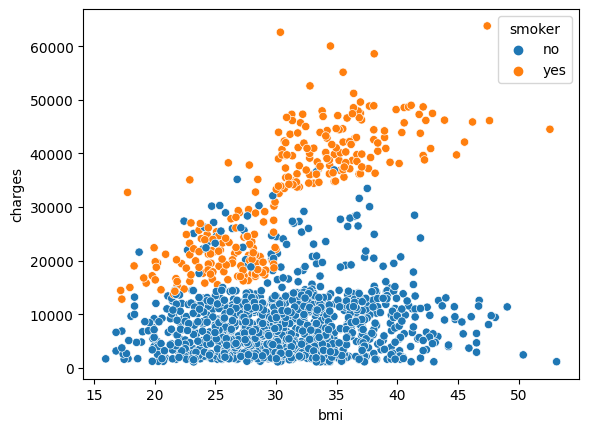

In [162]:
sns.scatterplot(x = df["bmi"], y = df["charges"],hue = df["smoker"])
#Lien entre bmi charge et fumeur

<AxesSubplot: xlabel='age', ylabel='charges'>

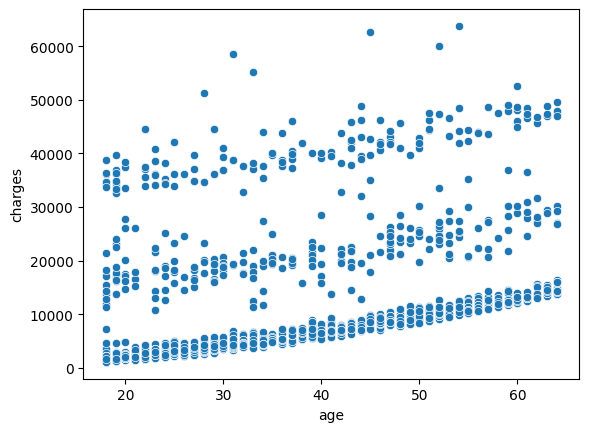

In [163]:
sns.scatterplot(x = df["age"], y = df["charges"])

<AxesSubplot: xlabel='bmi', ylabel='charges'>

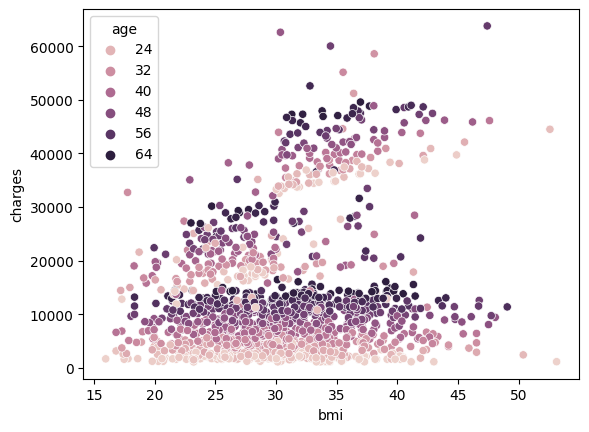

In [164]:
sns.scatterplot(x = df["bmi"], y = df["charges"],hue = df["age"])
#Lien entre bmi charge et age

<AxesSubplot: xlabel='age', ylabel='charges'>

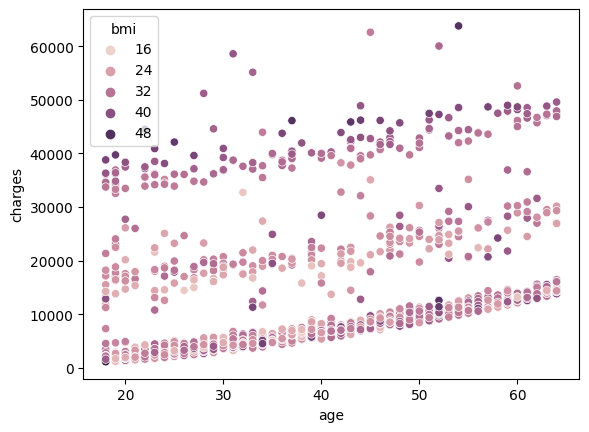

In [165]:
sns.scatterplot(x = df["age"], y = df["charges"],hue = df["bmi"])
#Lien entre bmi charge et age

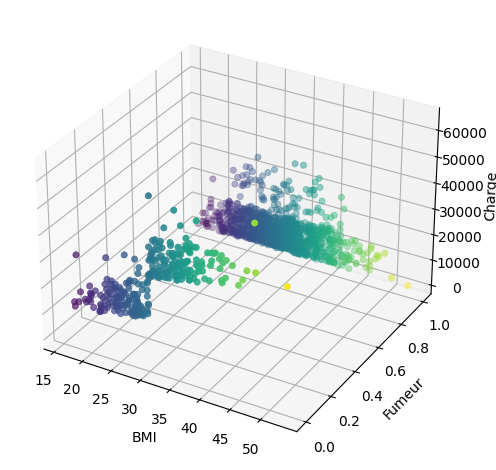

In [166]:
X = df['bmi']
Y = df['smoker'].replace({'yes':0,'no' :1})
Z = df['charges']

# Créer le graphique en 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=X, cmap='viridis', linewidth=0.5)
ax.set_xlabel('BMI')
ax.set_ylabel('Fumeur')
ax.set_zlabel('Charge')

# Afficher le graphique
plt.tight_layout()
plt.show()
#A animer ?

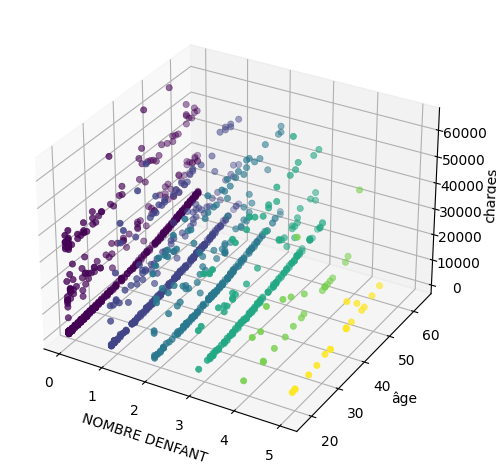

In [167]:
X = df['children']
Y = df['age']
Z = df['charges']

# Créer le graphique en 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=X, cmap='viridis', linewidth=0.5)
ax.set_xlabel('NOMBRE DENFANT')
ax.set_ylabel('âge')
ax.set_zlabel('charges')

# Afficher le graphique
plt.tight_layout()
plt.show()

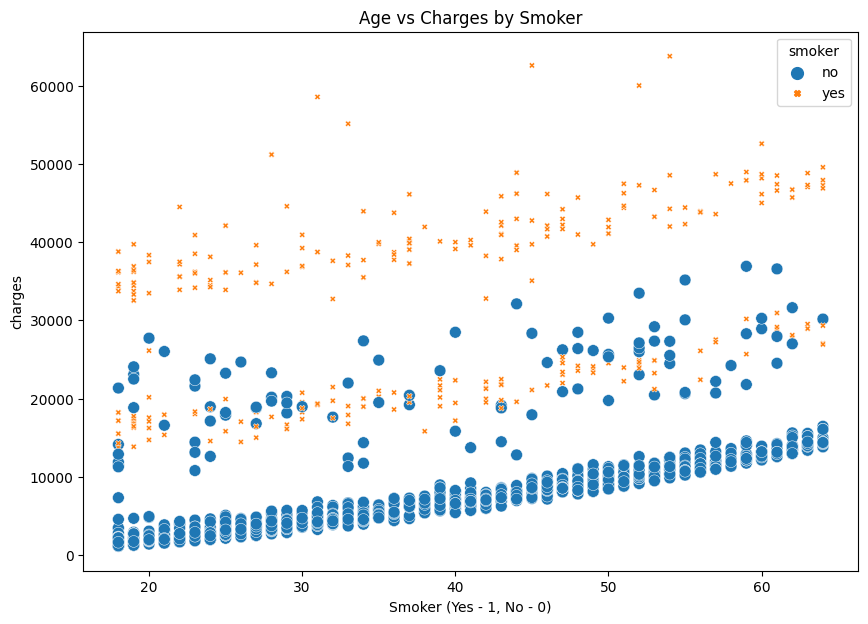

In [168]:
# Relation entre l'age, les charges et le statut de fumeur
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='age',y='charges', hue=df['smoker'],style = df['smoker'],size = df['smoker'], data=df)
ax.set_title("Age vs Charges by Smoker")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("charges")
plt.show(ax)

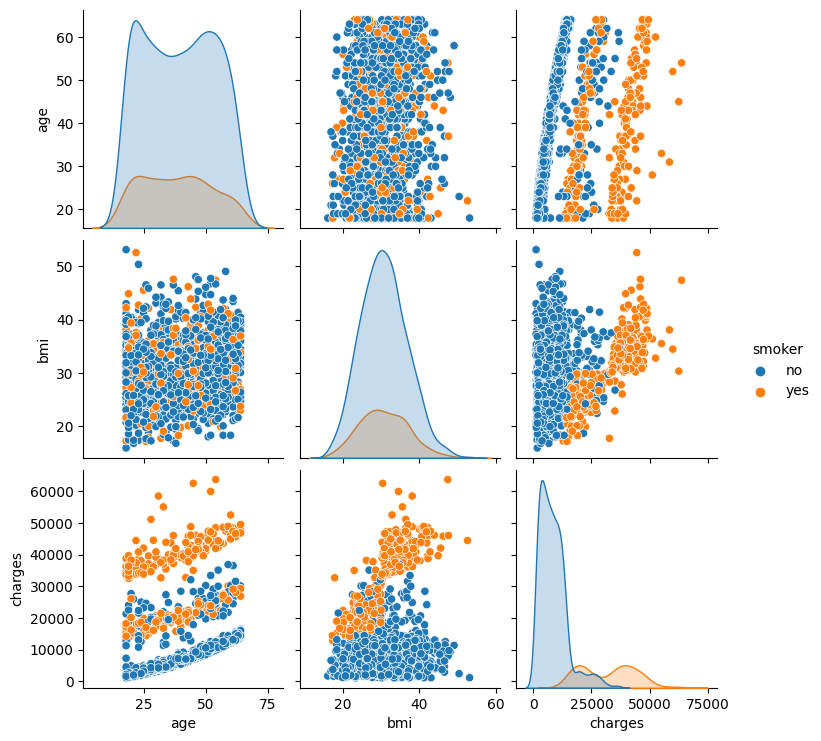

In [169]:


sns.pairplot(df, hue= 'smoker')
plt.show()

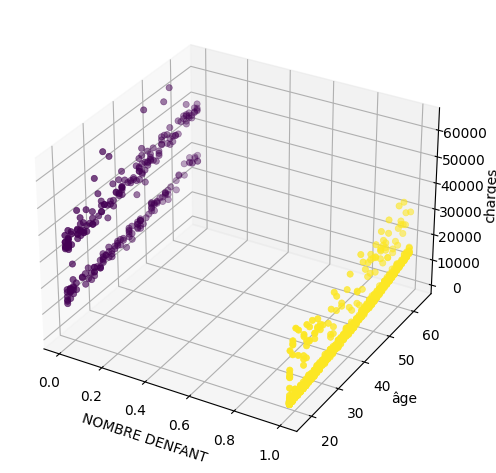

In [170]:
X = df['smoker'].replace({'yes':0,'no' :1})
Y = df['age']
Z = df['charges']

# Créer le graphique en 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=X, cmap='viridis', linewidth=0.5)
ax.set_xlabel('NOMBRE DENFANT')
ax.set_ylabel('âge')
ax.set_zlabel('charges')

# Afficher le graphique
plt.tight_layout()
plt.show()

Question n°4 Analyse bivarié

In [171]:
liste_variable

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [172]:
df['sex']=df['sex'].replace({'male':0,'female' :1})

In [173]:
df['smoker']=df['smoker'].replace({'yes':0,'no' :1})

In [174]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [175]:
df['region']=df['region'].replace({'southeast':0,'southwest' :1, 'northeast':2 ,'northwest':3})

In [176]:
#Le genre est une catégorie binaire , l' âge est une variable quantitative
#Pour tester la corrélation entre les 2 variable , je vais utiliser le test pointbiserialr

t_age_sex, p_age_sex = st.pointbiserialr(df["age"], df['sex'])

print("Score du test pointbiserialr test entre age et sex")
print("t-value:", t_age_sex)
print("p-value:", p_age_sex)

Score du test pointbiserialr test entre age et sex
t-value: 0.019813556101687183
p-value: 0.4691416725437408


Text(0.5, 1.0, 'Analyse du lien âge /genre')

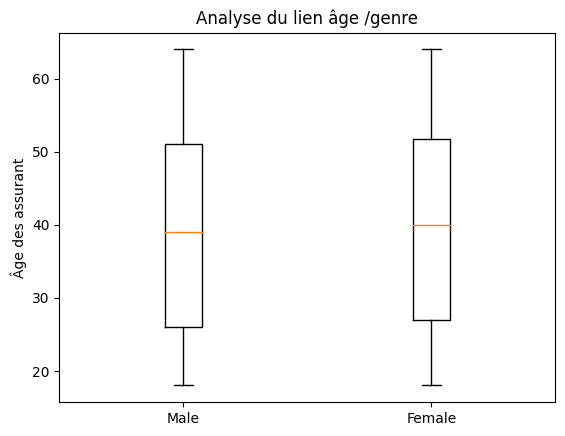

In [177]:
plt.figure()
plt.boxplot([df['age'][df['sex'] == 0], df['age'][df['sex'] == 1]])
plt.xticks([1, 2], ['Male', 'Female'])
plt.ylabel('Âge des assurant')
plt.title('Analyse du lien âge /genre')



<AxesSubplot: xlabel='sex', ylabel='age'>

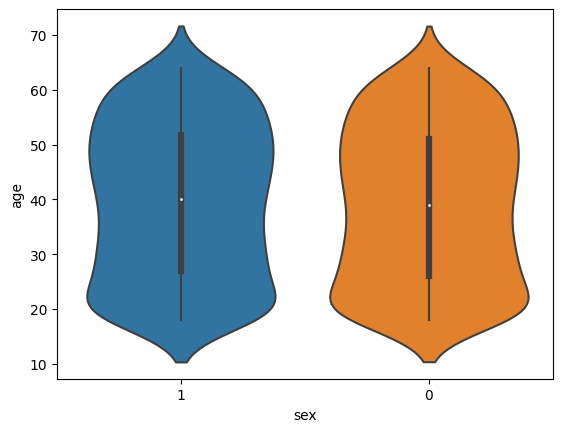

In [178]:
sns.violinplot(x='sex', y='age', data=df)

In [179]:
#L'âge est une variable quantitative , la bmi est aussi une variable quantitative
#Nous allons faire la correlation entre l'age et la bmi
correlation_age_bmi = df['age'].corr(df['bmi'])
print("correlation age et bmi:",correlation_age_bmi)

correlation age et bmi: 0.10934361041896887


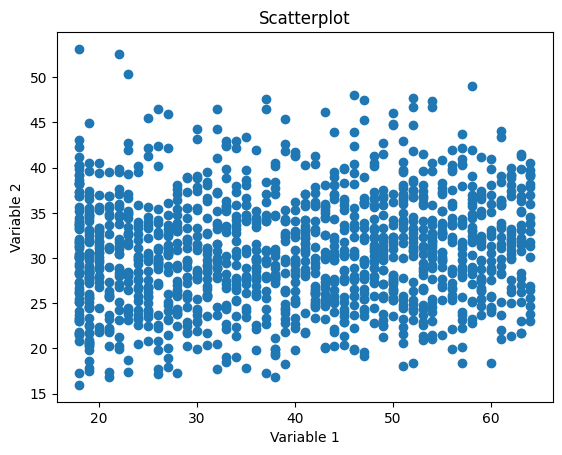

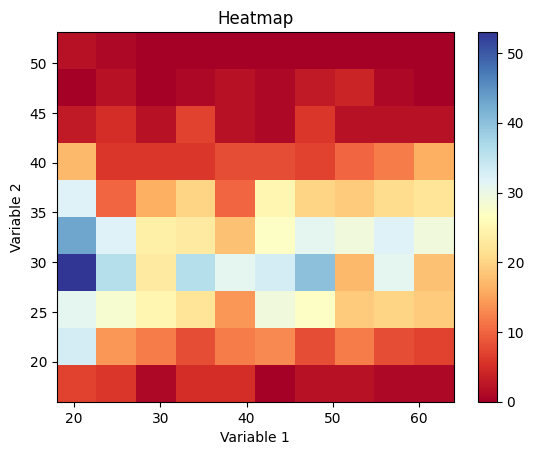

In [180]:

# Scatterplot
plt.figure()
plt.scatter(df["age"], df["bmi"])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatterplot')





# Heatmap
plt.figure()
plt.hist2d(df["age"], df["bmi"], cmap='RdYlBu')
plt.colorbar()
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Heatmap')


plt.show()


In [181]:
# Nous allons faire la correlation entre age une variable quantitative et le nombre d'enfants (catégorie) ici nous allons faire un t-test

t_age_enfant, p_age_enfant = st.ttest_ind(df["age"], df['children'])


print("T-test entre age et enfant")
print("t-value:", t_age_enfant)
print("p-value:", p_age_enfant)

T-test entre age et enfant
t-value: 98.89998385371854
p-value: 0.0


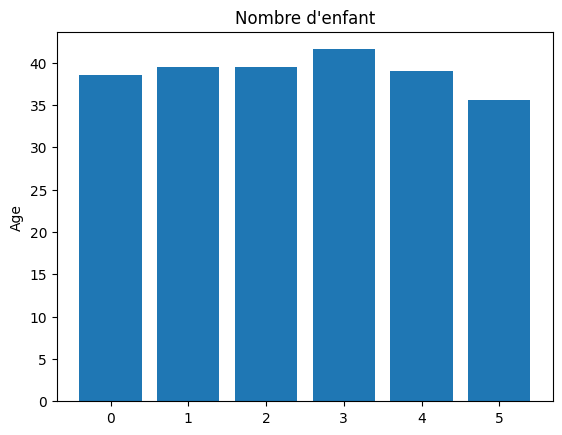

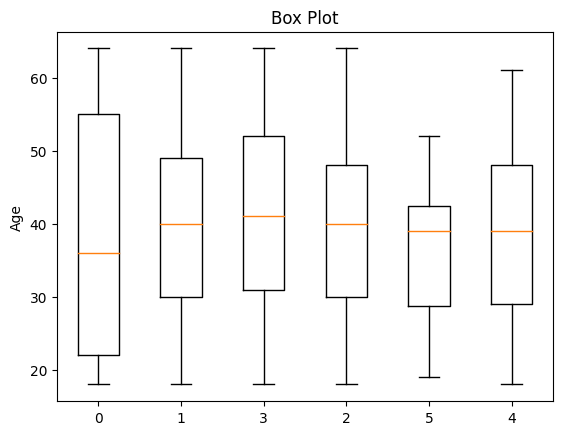

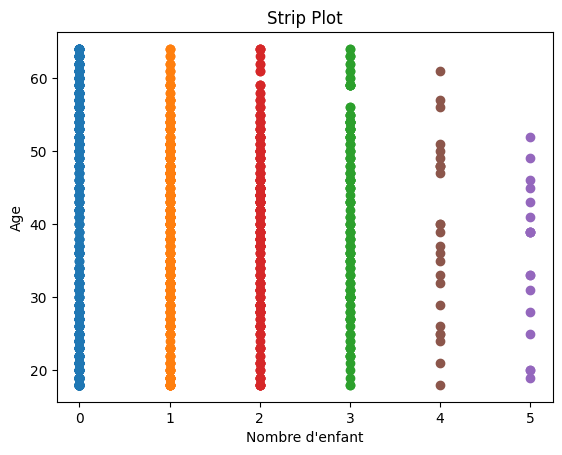

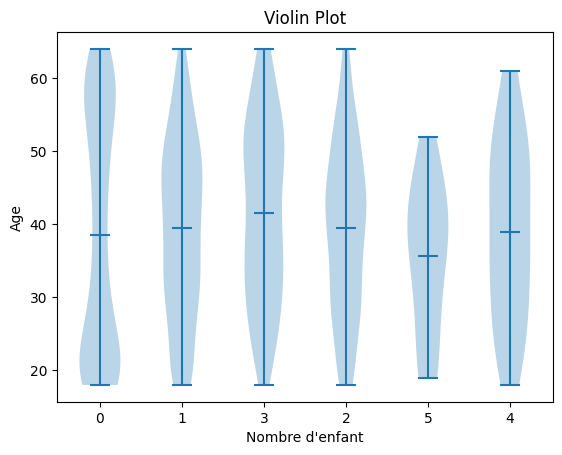

In [182]:
categories_enfant = df['children'].unique()
data_age = df['age']


grouped_data_enfant = [data_age[df['children'] == category] for category in categories_enfant]

# Bar chart
plt.figure()
plt.bar(categories_enfant, [np.mean(data_age) for data_age in grouped_data_enfant])
plt.ylabel('Age')
plt.title("Nombre d'enfant")

# Box plot
plt.figure()
plt.boxplot(grouped_data_enfant, labels=categories_enfant)
plt.ylabel("Age")
plt.title('Box Plot')

# Strip plot
plt.figure()
for category, data_age in zip(categories_enfant, grouped_data_enfant):
    plt.plot(np.ones(len(data_age)) * category, data_age, 'o')
plt.xlabel("Nombre d'enfant")
plt.ylabel('Age')
plt.title('Strip Plot')

# Violin plot
plt.figure()
plt.violinplot(grouped_data_enfant, positions=np.arange(len(categories_enfant)), showmeans=True)
plt.xticks(np.arange(len(categories_enfant)), categories_enfant)
plt.xlabel("Nombre d'enfant")
plt.ylabel('Age')
plt.title('Violin Plot')

plt.show()

In [183]:
#Le fait de fumer est une catégorie binaire , l' âge est une variable quantitative
#Pour tester la corrélation entre les 2 variable , je vais utiliser le test pointbiserialr

t_age_smoker, p_age_smoker = st.pointbiserialr(df["age"], df['smoker'])

print("Score du test pointbiserialr test entre age et smoker")
print("t-value:", t_age_smoker)
print("p-value:", p_age_smoker)

Score du test pointbiserialr test entre age et smoker
t-value: 0.025587117601993982
p-value: 0.34985468570062983


Text(0.5, 1.0, 'Analyse du lien âge /Fumeur')

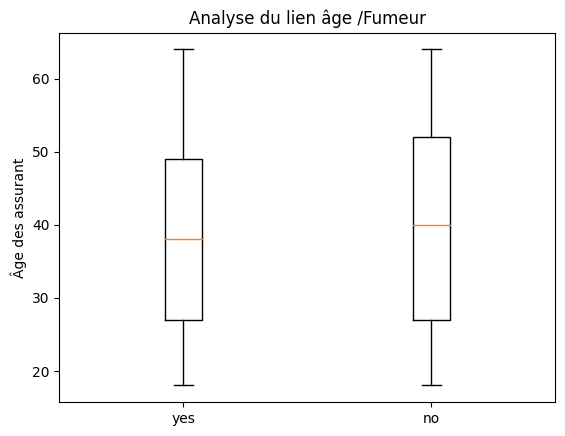

In [184]:
plt.figure()
plt.boxplot([df['age'][df['smoker'] == 0], df['age'][df['smoker'] == 1]])
plt.xticks([1, 2], ['yes', 'no'])
plt.ylabel('Âge des assurant')
plt.title('Analyse du lien âge /Fumeur')

<AxesSubplot: xlabel='smoker', ylabel='age'>

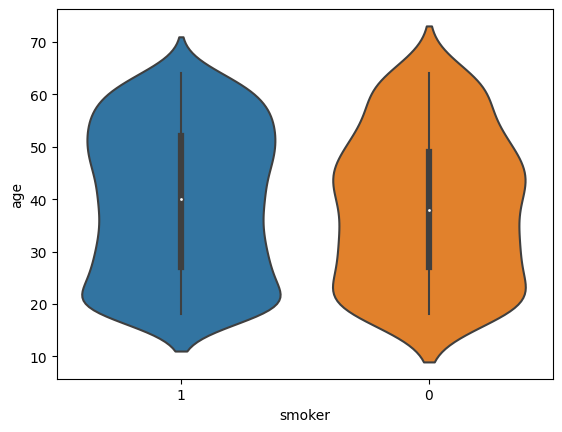

In [185]:
sns.violinplot(x='smoker', y='age', data=df)

In [186]:
#Test Krustal

chargesSerie = df['age']
regions = [region for region in df['region'].unique()]
chargesSeriesPerRegion = [list(chargesSerie[df['region'] == region]) for region in regions]
data = [df[df['region'] == r]['age'] for r in df['region'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = st.kruskal(*data)

print(f"Mesure de Kruskal = {stat:.3f}, p_value = {p_value:.3f}")
#Le test kruskal peut être plus intéressant car plus résistant pour des données sans distributions normales

Mesure de Kruskal = 0.431, p_value = 0.934


In [187]:
#Maintenant nous allons faire la correlation entre age une variable quantitative et les régions (catégorie) ici nous allons faire un t-test

t_age_region, p_age_region = st.ttest_ind(df["age"], df['region'])

print("T-test entre age et region")
print("t-value:", t_age_region)
print("p-value:", p_age_region)

#On preferera le t-test

T-test entre age et region
t-value: 98.01195500674011
p-value: 0.0


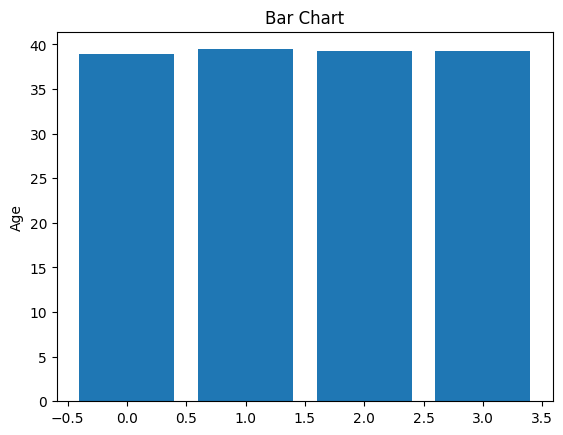

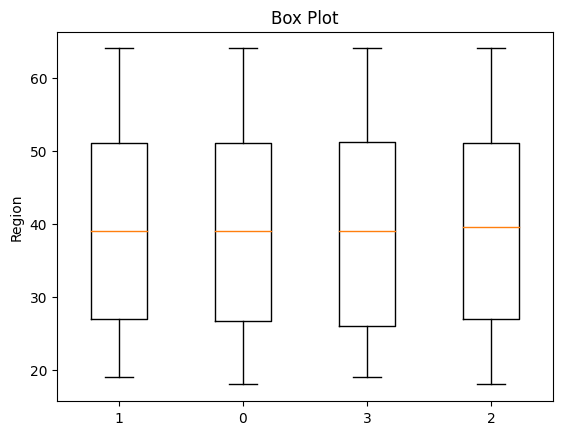

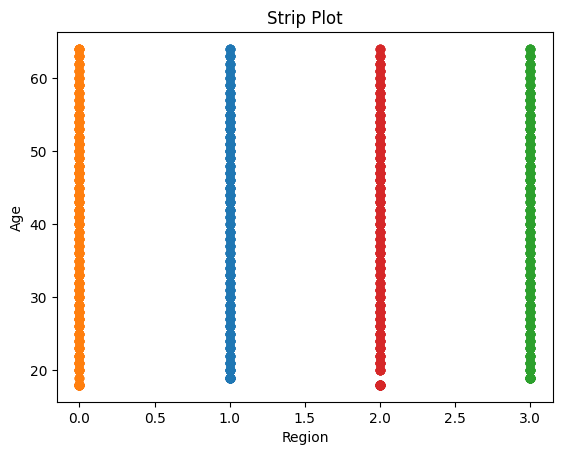

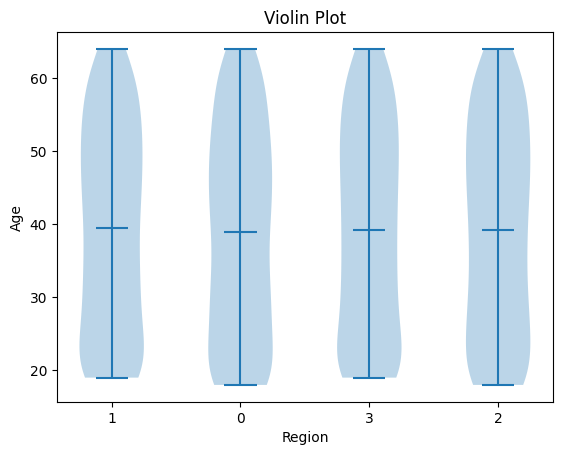

In [188]:
categories_region = df['region'].unique()
data_age_region = df['age']

# Create a list of arrays, one for each level of the categorical variable
grouped_data_enfant = [data_age_region[df['region'] == category] for category in categories_region]

# Bar chart
plt.figure()
plt.bar(categories_region, [np.mean(data_age_region) for data_age_region in grouped_data_enfant])
plt.ylabel('Age')
plt.title('Bar Chart')

# Box plot
plt.figure()
plt.boxplot(grouped_data_enfant, labels=categories_region)
plt.ylabel('Region')
plt.title('Box Plot')

# Strip plot
plt.figure()
for category, data_age_region in zip(categories_region, grouped_data_enfant):
    plt.plot(np.ones(len(data_age_region)) * category, data_age_region, 'o')
plt.xlabel('Region')
plt.ylabel('Age')
plt.title('Strip Plot')

# Violin plot
plt.figure()
plt.violinplot(grouped_data_enfant, positions=np.arange(len(categories_region)), showmeans=True)
plt.xticks(np.arange(len(categories_region)), categories_region)
plt.xlabel('Region')
plt.ylabel('Age')
plt.title('Violin Plot')


plt.show()

In [189]:
#L'âge est une variable quantitative , la charge est aussi une variable quantitative
#Nous allons faire la correlation entre l'age et les charges
correlation_age_charge = df['age'].corr(df['charges'])
print("correlation age et charges:",correlation_age_charge)

correlation age et charges: 0.2983082125097864


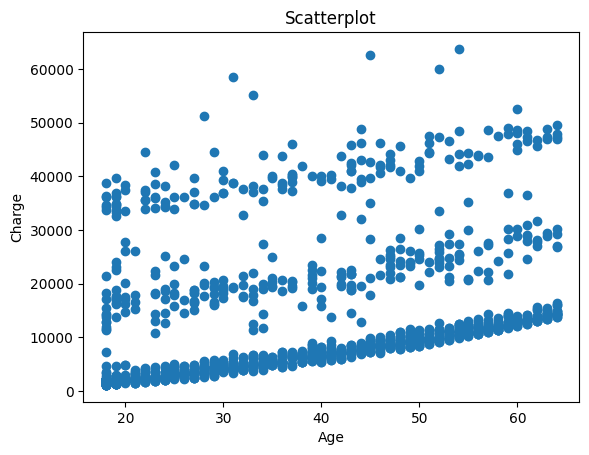

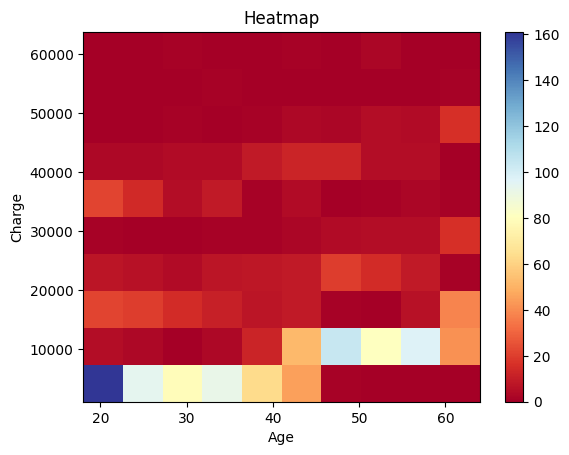

In [190]:
# Scatterplot
plt.figure()
plt.scatter(df["age"], df["charges"])
plt.xlabel('Age')
plt.ylabel('Charge')
plt.title('Scatterplot')





# Heatmap
plt.figure()
plt.hist2d(df["age"], df["charges"], cmap='RdYlBu')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Charge')
plt.title('Heatmap')


plt.show()

Analyse des fumeurs

In [191]:
#Smoker est une variable qualitative ici une catégorie binaire, ce qui veut dire que l'on va faire des t-test via pointbiserialr 
#Le fait de fumer est une catégorie binaire , l' âge est une variable quantitative
#Pour tester la corrélation entre les 2 variable , je vais utiliser le test pointbiserialr


t_smoker_age, p_smoker_age = st.pointbiserialr(df["smoker"],df['age'])

print("Score du test pointbiserialr test entre smoker age")
print("t-value:", t_smoker_age)
print("p-value:", p_smoker_age)


Score du test pointbiserialr test entre smoker age
t-value: 0.025587117601993982
p-value: 0.34985468570062983


Text(0.5, 1.0, 'Analyse du lien âge /Fumeur')

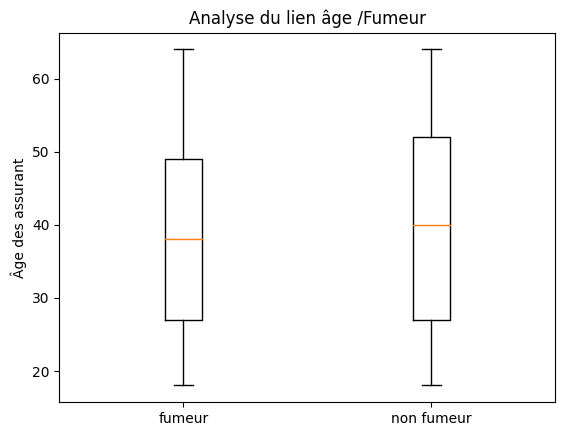

In [192]:
plt.figure()
plt.boxplot([df['age'][df['smoker'] == 0], df['age'][df['smoker'] == 1]])
plt.xticks([1, 2], ['fumeur', 'non fumeur'])
plt.ylabel('Âge des assurant')
plt.title('Analyse du lien âge /Fumeur')

<AxesSubplot: xlabel='smoker', ylabel='age'>

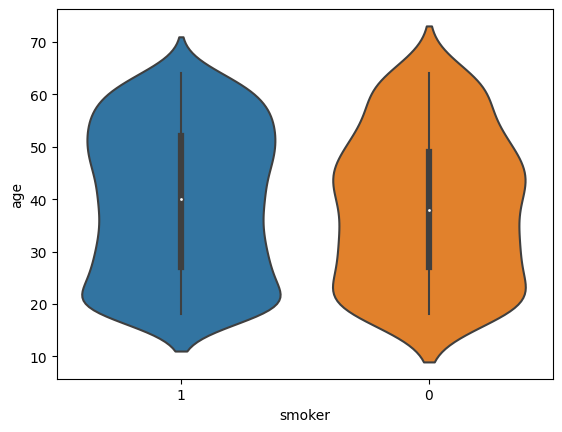

In [193]:
sns.violinplot(x='smoker', y='age', data=df)

In [194]:
#Nous allons prefer le test de McNemar car plus adapté si les deux variables sont catégorielles binaires
#Test McNemar

# Calculez les fréquences des deux variables
contingency_table = pd.crosstab(df['smoker'], df['sex'])

# Exécutez le test de McNemar
p = st.binom_test(contingency_table.iloc[1,0], contingency_table.iloc[1,0] + contingency_table.iloc[1,1],
                p=float(contingency_table.iloc[0,0])/(contingency_table.iloc[0,0] + contingency_table.iloc[0,1]))


print(p)

0.0019990030484697083


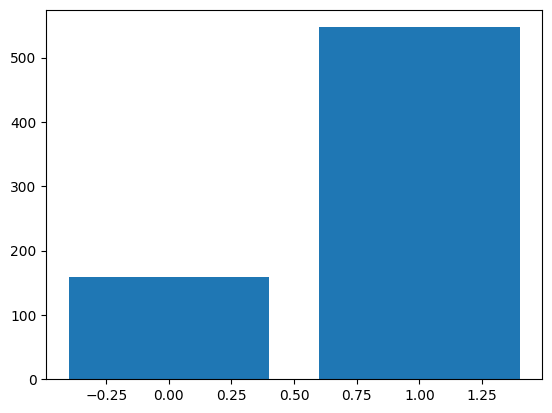

In [195]:
# Comptez le nombre d'observations dans chaque catégorie
counts = df.groupby(['smoker', 'sex']).size().reset_index(name='count')

# Créez le diagramme à barres empilées
plt.bar(counts['smoker'], counts['count'], label=counts['sex'])



# Affichez le graphique
plt.show()


In [196]:
#la BMI est une variable quantitative, le fait de fumer est une catégorie binaires on va faire un pointbiserialr

t_smoker_bmi, p_smoker_bmi = st.pointbiserialr(df["smoker"], df['bmi'])

print("Pointbiserialr entre le fait de fumer et la  bmi")
print("t-value:", t_smoker_bmi)
print("p-value:", p_smoker_bmi)

Pointbiserialr entre le fait de fumer et la  bmi
t-value: -0.003746216946200323
p-value: 0.8911471317219222


Text(0.5, 1.0, 'Analyse du lien BMI /Fumeur')

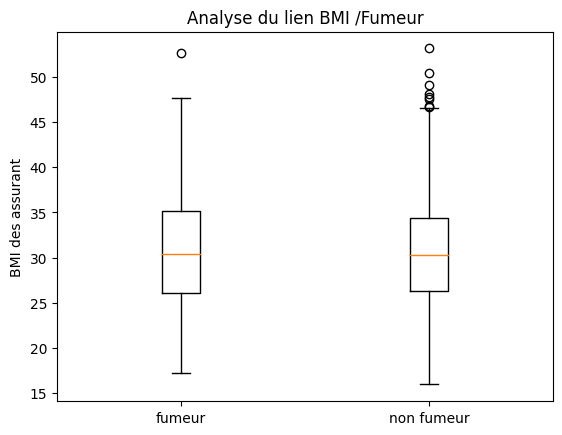

In [197]:
plt.figure()
plt.boxplot([df['bmi'][df['smoker'] == 0], df['bmi'][df['smoker'] == 1]])
plt.xticks([1, 2], ['fumeur', 'non fumeur'])
plt.ylabel('BMI des assurant')
plt.title('Analyse du lien BMI /Fumeur')

<AxesSubplot: xlabel='smoker', ylabel='age'>

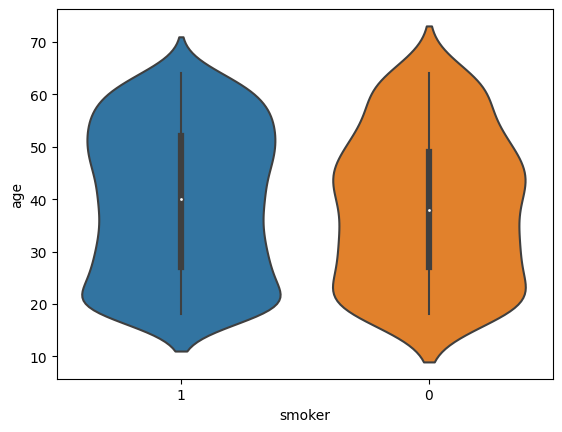

In [198]:
sns.violinplot(x='smoker', y='age', data=df)

In [199]:
#Le fait de fumer est une variable catégorielle binaire , le nombre d'enfant est une variable catégorielle , 
#nous allons donc utiliser le test du chi deux


contingency_table_smoker_children = pd.crosstab(df['smoker'], df['children'])


chi2_1_2, p_1_2, dof_1_2, expected_1_2 = st.chi2_contingency(contingency_table_smoker_children)

print("Test du chi-deux entre le fait de fumer et le nombre d'enfant")
print("chi-square value:", chi2_1_2)
print("p-value:", p_1_2)


Test du chi-deux entre le fait de fumer et le nombre d'enfant
chi-square value: 6.873108602314256
p-value: 0.23024973344770527


In [200]:
#Le fait de fumer est une variable catégorielle binaire , le region est une variable catégorielle , 
#nous allons donc utiliser le test du chi deux

contingency_table = pd.crosstab(df['region'], df['smoker'])

# Use the chi2_contingency function to perform the chi-square test
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

# Print the chi-square
# Print chi-square value and p-value
print("Test du chi-deux entre le fait de fumer et la region")
print("chi-square value:", chi2)
print("p-value:", p)

Test du chi-deux entre le fait de fumer et la region
chi-square value: 7.27790254132191
p-value: 0.06354826573182334


In [201]:
#la charge est une variable quantitative, le fait de fumer est une catégorie binaires on va faire un pointbiserialr

t_smoker_charges, p_smoker_charges = st.pointbiserialr(df["smoker"], df['charges'])


print("Pointbiserialr entre le fait de fumer et la  charges")
print("t-value:", t_smoker_charges)
print("p-value:", p_smoker_charges)

Pointbiserialr entre le fait de fumer et la  charges
t-value: -0.7872343672800316
p-value: 1.4067220949375363e-282


Text(0.5, 1.0, 'Analyse du lien charges /Fumeur')

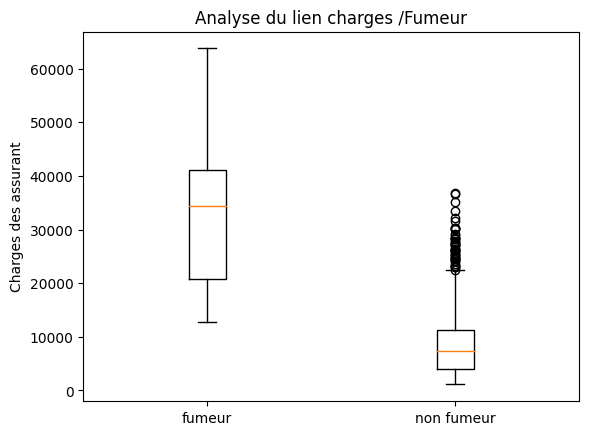

In [202]:
plt.figure()
plt.boxplot([df['charges'][df['smoker'] == 0], df['charges'][df['smoker'] == 1]])
plt.xticks([1, 2], ['fumeur', 'non fumeur'])
plt.ylabel('Charges des assurant')
plt.title('Analyse du lien charges /Fumeur')

<AxesSubplot: xlabel='smoker', ylabel='age'>

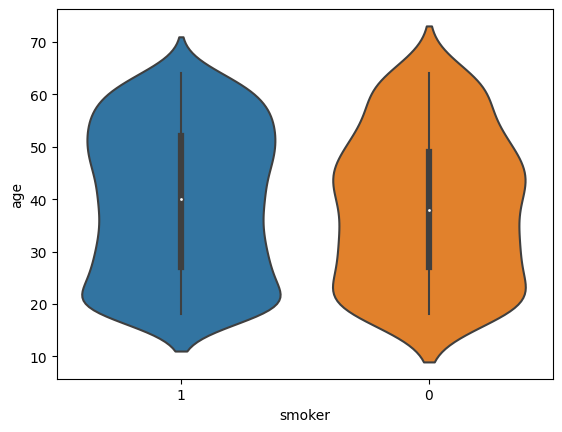

In [203]:
sns.violinplot(x='smoker', y='age', data=df)

On peut importer les données finals

In [204]:
# Écriture du dataframe dans un fichier CSV
file = open('donnée_nettoye.csv', 'w')
df.to_csv(file, index=False)
file.close()